In [39]:

import matplotlib.pyplot as plt
import numpy as np

#plt.style.use("ultrasurfaces_plotstyle.mplstyle")

from toy_mc import generator
from importlib import reload

In [40]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = generator.OscPars(delta_msq_31, sinsq_2theta_23)

default_response = generator.Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

In [41]:
reload(generator)

<module 'toy_mc.generator' from '/Users/trettin/projects/ultrasurface paper/ultrasurfaces/toy_mc/generator.py'>

In [42]:
gen = generator.Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [43]:
gen.detector_response

Response(mu=1.0, sigma=0.05)

In [44]:
h0.hist_unc

array([33.59421447, 42.50269889, 46.99921488, 46.65973725, 43.03606944,
       34.45511909, 27.28572562, 19.00390684, 12.58407246,  8.07485657,
        6.06374492,  7.0210885 ,  9.06325938, 11.82372569, 15.02579504,
       17.62444729, 21.09194844, 23.23389823, 25.27634969, 26.89109425,
       28.66026969, 28.94748039, 28.44491692, 29.83079348, 28.51507872])

In [45]:
h0.hist

array([1521.94639007, 2148.07046841, 2474.58339001, 2490.32232597,
       2299.98262357, 1712.1865442 , 1311.81637922,  819.10174533,
        497.96583807,  301.22689405,  237.59742055,  278.93678135,
        372.69924266,  502.98460923,  678.89490153,  793.69515197,
        972.62601894, 1062.28294866, 1129.04286081, 1169.68989122,
       1227.85248761, 1181.34010354, 1086.14442722, 1132.7035983 ,
        998.88773832])

In [46]:
from toy_mc.histogram import plot_histogram

[]

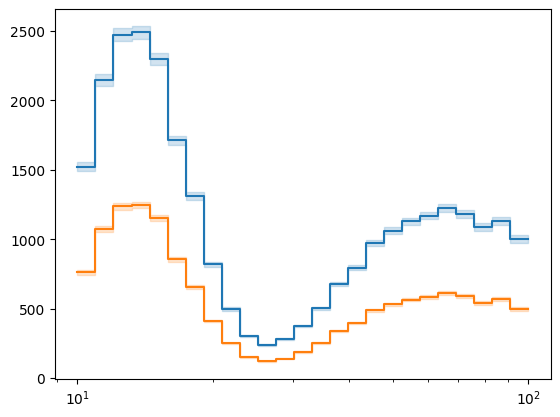

In [47]:
fig, ax = plt.subplots()
plot_histogram(h0, ax=ax)
plot_histogram(h0 / 2, ax=ax)
plt.semilogx()

In [48]:
gen.events

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights
0,21.759369,-1.0,0.101547,24.784118,0.101547
1,20.805690,-1.0,0.154514,26.781157,0.154514
2,14.351200,-1.0,0.909427,17.014481,0.909427
3,38.110655,-1.0,0.246106,35.445434,0.246106
4,7.943228,-1.0,0.170534,8.748588,0.170534
...,...,...,...,...,...
99995,6.921691,-1.0,0.844567,6.758038,0.844567
99996,35.598303,-1.0,0.186712,37.801956,0.186712
99997,3.331163,-1.0,0.877687,3.182964,0.877687
99998,19.478304,-1.0,0.256778,15.524013,0.256778


In [49]:
gen_2 = generator.Generator(
    int(1e5),
    default_response,
    generator.OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta),
)
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [50]:
gen_3 = generator.Generator(
    int(1e5), generator.Response(1.2 * default_response.mu, default_response.sigma), default_pars
)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


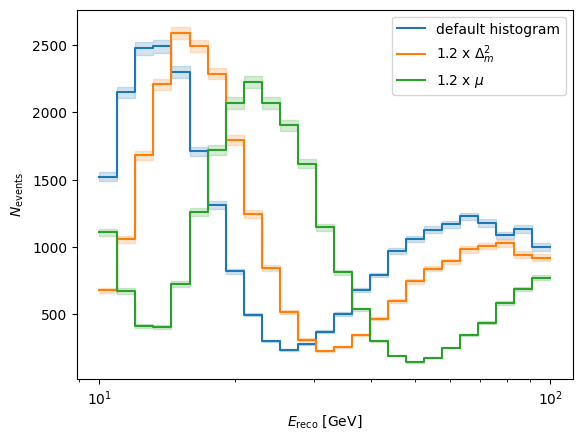

In [51]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

plot_histogram(h0, ax=ax, label=r'default histogram')

plot_histogram(h2, ax=ax, label=r'1.2 x $\Delta_m^2$ ')

plot_histogram(h3, ax=ax, label=r'1.2 x $\mu$')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ [GeV]')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

In [52]:
from surfaces import calculate_probs

In [53]:
reload(generator)
gen_nominal = generator.Generator(
    int(1e5), default_response, default_pars, name="nominal", rng_seed=0
)
# It looks like there is a breakdown point where, if the response is *too* different,
# the whole thing doesn't work anymore.
gen_sys_1 = generator.Generator(
    int(1e5),
    generator.Response(1.1 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_01",
    rng_seed=0
)
gen_sys_2 = generator.Generator(
    int(1e5),
    generator.Response(0.90 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_02",
    rng_seed=0
)
gen_sys_3 = generator.Generator(
    int(1e5),
    generator.Response(0.95 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_03",
    rng_seed=0
)
gen_sys_4 = generator.Generator(
    int(1e5),
    generator.Response(1.05 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_04",
    rng_seed=0
)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [54]:
reload(calculate_probs)
df_with_probs = calculate_probs.calculate_probs_sklearn(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=True,
    neighbors_per_class=200,
    jobs=4
)

Starting KNN evaluation...


100%|██████████| 10/10 [01:31<00:00,  9.17s/it]


In [55]:
df_with_probs_no_tilt_corr = calculate_probs.calculate_probs_sklearn(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=False,
    neighbors_per_class=200,
    jobs=4
)

Starting KNN evaluation...


100%|██████████| 10/10 [00:29<00:00,  2.93s/it]


In [56]:
reload(calculate_probs)
df_with_probs_mlp = calculate_probs.calculate_probs_sklearn(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    classifiertype="mlp",
    verbose_training=True,
    max_iter=10,
    alpha=1e-7,
    activation="relu",
    hidden_layer_sizes=(20, 20)
)

Iteration 1, loss = 1.13763737
Iteration 2, loss = 1.08577430
Iteration 3, loss = 1.08402903
Iteration 4, loss = 1.08329884
Iteration 5, loss = 1.08260930
Iteration 6, loss = 1.08217485
Iteration 7, loss = 1.08184173
Iteration 8, loss = 1.08162394
Iteration 9, loss = 1.08147860
Iteration 10, loss = 1.08139292
Starting MLP evaluation...


/Users/trettin/projects/ultrasurface paper/ultrasurfaces/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
df_with_probs_mlp

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,prob_sys_03,prob_sys_04
0,30.012000,-1.0,0.062063,22.077279,0.062063,nominal,0.111864,0.000269,0.505569,0.372744,0.009554
1,12.509443,-1.0,0.988422,11.000129,0.988422,nominal,0.265507,0.004454,0.251104,0.419947,0.058988
2,4.223824,-1.0,0.960612,4.648659,0.960612,nominal,0.165402,0.384072,0.001581,0.027448,0.421497
3,80.468674,-1.0,0.769647,70.787222,0.769647,nominal,0.356750,0.018165,0.142512,0.361096,0.121477
4,89.158501,-1.0,0.809329,67.934656,0.809329,nominal,0.209996,0.002475,0.322276,0.426948,0.038304
...,...,...,...,...,...,...,...,...,...,...,...
99995,139.128666,-1.0,0.918399,117.615852,0.918399,nominal,0.333751,0.013685,0.169065,0.381606,0.101892
99996,329.298718,-1.0,0.985088,441.580076,0.985088,nominal,0.243546,0.266961,0.003850,0.051898,0.433744
99997,21.282419,-1.0,0.126044,21.576838,0.126044,nominal,0.397326,0.070637,0.043836,0.212424,0.275776
99998,80.893370,-1.0,0.771852,71.962719,0.771852,nominal,0.365722,0.020667,0.132103,0.350978,0.130530


In [58]:
from toy_mc.histogram import Histogram

In [59]:
weighted_hist = Histogram(bin_edges)
weighted_hist.fill(
    df_with_probs["reco_energy"],
    df_with_probs["weights"]
    * df_with_probs["prob_sys_01"]
    / df_with_probs["prob_nominal"],
)

weighted_hist_no_tilt_corr = Histogram(bin_edges)
weighted_hist_no_tilt_corr.fill(
    df_with_probs_no_tilt_corr["reco_energy"],
    df_with_probs_no_tilt_corr["weights"]
    * df_with_probs_no_tilt_corr["prob_sys_01"]
    / df_with_probs_no_tilt_corr["prob_nominal"],
)

weighted_hist_mlp = Histogram(bin_edges)
weighted_hist_mlp.fill(
    df_with_probs_mlp["reco_energy"],
    df_with_probs_mlp["weights"]
    * df_with_probs_mlp["prob_sys_01"]
    / df_with_probs_mlp["prob_nominal"],
)

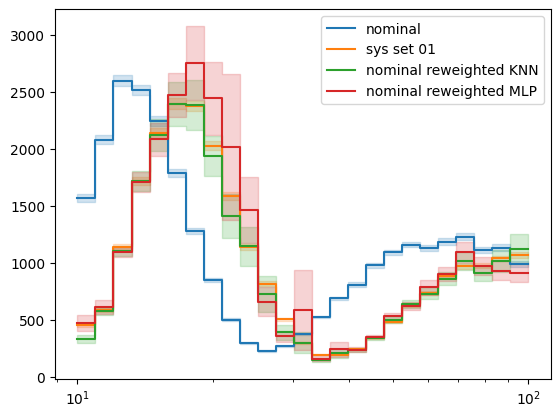

In [60]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

plot_histogram(nominal_hist, ax=ax, label="nominal")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(weighted_hist, ax=ax, label="nominal reweighted KNN")
# plot_histogram(weighted_hist_no_tilt_corr, ax=ax, label="without tilt corr")
plot_histogram(weighted_hist_mlp, ax=ax, label="nominal reweighted MLP")
plt.semilogx()
plt.legend()
plt.show()

In [61]:
from surfaces import calculate_grads
reload(calculate_grads)

<module 'surfaces.calculate_grads' from '/Users/trettin/projects/ultrasurface paper/ultrasurfaces/surfaces/calculate_grads.py'>

In [62]:
# get gradient names for systematic "mu"
grad_names = calculate_grads.make_gradient_names(["mu"], 2)
grad_names

['grad__mu', 'grad__mu__mu']

In [63]:
# make delta_p matrix for the systematic "mu" 
# (i.e. the detector response)
delta_p = calculate_grads.make_delta_p_from_grad_names(
    grad_names, [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4], gen_nominal
)
delta_p

array([[ 0.    ,  0.1   , -0.1   , -0.05  ,  0.05  ],
       [ 0.    ,  0.01  ,  0.01  ,  0.0025,  0.0025]])

In [64]:
# reload(calculate_grads)
# Calculate the gradients
df_with_grads = calculate_grads.fit_gradients(
    # Dataframe with probabilities
    df_with_probs, 
    # Columns with the probabilities
    prob_columns=["prob_nominal", "prob_sys_01", "prob_sys_02", "prob_sys_03", "prob_sys_04"], 
    # The size of the shift
    delta_p=delta_p, 
    # The names of the new columns
    grad_names=grad_names
)

100%|██████████| 100000/100000 [02:17<00:00, 726.66it/s]


In [65]:
from surfaces import calculate_grad_net

In [159]:
reload(calculate_grad_net)

<module 'surfaces.calculate_grad_net' from '/Users/trettin/projects/ultrasurface paper/ultrasurfaces/surfaces/calculate_grad_net.py'>

In [ ]:
df_grad_net = calculate_grad_net.run_grad_net(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    param_names=["mu"],
    verbose=1,
    epochs=25,
    shuffle=True,
    activation="relu",
    hidden_layer_sizes=(20, 20, 20),
    poly_order=3
)

In [163]:
df_grad_net_poly3 = calculate_grad_net.run_grad_net(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    param_names=["mu"],
    verbose=1,
    epochs=20,
    shuffle=True,
    activation="relu",
    hidden_layer_sizes=(100, 100),
    poly_order=3,
    # learning_rate=1e-4
)

Epoch 1/50
500/500 [==============================] - 4s 6ms/step - loss: 1.5747
Epoch 2/50
500/500 [==============================] - 3s 6ms/step - loss: 1.3710
Epoch 3/50
500/500 [==============================] - 3s 5ms/step - loss: 1.2426
Epoch 4/50
500/500 [==============================] - 3s 7ms/step - loss: 1.2184
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1965
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1697
Epoch 7/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1437
Epoch 8/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1253
Epoch 9/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1143
Epoch 10/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1079
Epoch 11/50
500/500 [==============================] - 3s 6ms/step - loss: 1.1037
Epoch 12/50
500/500 [==============================] - 3s 7ms/step - loss: 1.1010
Epoch 13/50
500/500 [====

In [164]:
df_grad_net_poly3

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,prob_sys_03,prob_sys_04,grad__mu,grad__mu__mu,grad__mu__mu__mu
0,30.012000,-1.0,0.062063,22.077279,0.062063,nominal,0.101496,0.000384,0.511774,0.376171,0.010175,-36.141453,-198.009460,16.186939
1,12.509443,-1.0,0.988422,11.000129,0.988422,nominal,0.248280,0.005854,0.272404,0.413706,0.059756,-19.398119,-182.738037,19.701406
2,4.223824,-1.0,0.960612,4.648659,0.960612,nominal,0.182743,0.386263,0.003834,0.039535,0.387625,22.750309,-155.787598,31.283878
3,80.468674,-1.0,0.769647,70.787222,0.769647,nominal,0.356573,0.011573,0.136311,0.385453,0.110090,-12.597848,-219.472092,26.667828
4,89.158501,-1.0,0.809329,67.934656,0.809329,nominal,0.212350,0.001786,0.306032,0.446311,0.033522,-25.944397,-220.653168,22.453011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,139.128666,-1.0,0.918399,117.615852,0.918399,nominal,0.346847,0.007561,0.145871,0.408620,0.091101,-15.077994,-234.602661,27.931801
99996,329.298718,-1.0,0.985088,441.580076,0.985088,nominal,0.262989,0.226277,0.001368,0.037949,0.471417,25.079582,-270.446167,46.150333
99997,21.282419,-1.0,0.126044,21.576838,0.126044,nominal,0.395891,0.070182,0.045222,0.220171,0.268533,1.915086,-194.979889,28.244938
99998,80.893370,-1.0,0.771852,71.962719,0.771852,nominal,0.366912,0.013277,0.125167,0.374972,0.119672,-11.488588,-219.726486,27.068546


In [122]:
# generate a histogram by weighting the nominal events to any detector response using the gradients in the dataframe
def generate_histogram_at_response(df, nominal_response, response, bin_edges, use_systs=None, variable="reco_energy"):
    """Generate a histogram at a given detector response.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the events and gradients
    nominal_response : toy_mc.generator.Response
        Nominal detector response
    response : toy_mc.generator.Response
        Detector response to weight the events to
    bin_edges : np.ndarray
        Bin edges for the histogram
    use_systs : list of str, optional
        List of systematic names to use. If None, all systematics are used.
    variable : str, optional
        Variable to use for the histogram. Default is "reco_energy".
    """
    if use_systs is None:
        grad_names = df.columns[df.columns.str.startswith("grad__")]
    else:
        grad_names = ["grad_{}".format(syst) for syst in use_systs]
    delta_p = np.ones(len(grad_names))
    for i, grad_name in enumerate(grad_names):
        for param in grad_name.split("grad")[-1].split("__")[1:]:
            delta_p[i] *= getattr(response, param) - getattr(nominal_response, param)
    weights = df["weights"] * np.exp(np.dot(df[grad_names], delta_p))
    hist = Histogram(bin_edges)
    hist.fill(df[variable], weights)
    return hist

In [123]:
def chi_square(hist1, hist2):
    """Calculate the chi square between two Histogram objects.
    This takes errors into account.
    """
    # get values
    values1 = hist1.hist
    values2 = hist2.hist
    # get errors
    errors1 = hist1.hist_unc
    errors2 = hist2.hist_unc
    # calculate chi square
    chi_square = np.sum((values1 - values2)**2 / (errors1**2 + errors2**2))
    return chi_square

30.925748929771842


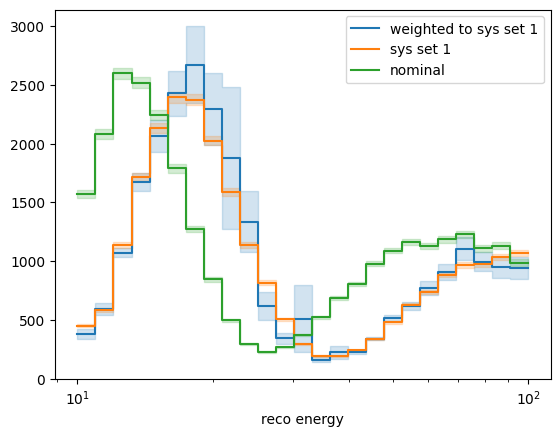

In [165]:
# generate a histogram at the response of sys set 01 using gradients

hist_at_sys_01 = generate_histogram_at_response(
    df_grad_net_poly3,
    default_response,
    gen_sys_1.detector_response,
    bin_edges
)
sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

print(chi_square(hist_at_sys_01, sys_hist))

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 1")
plot_histogram(sys_hist, ax=ax, label="sys set 1")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.xlabel("reco energy")
plt.semilogx()
plt.legend()
plt.show()

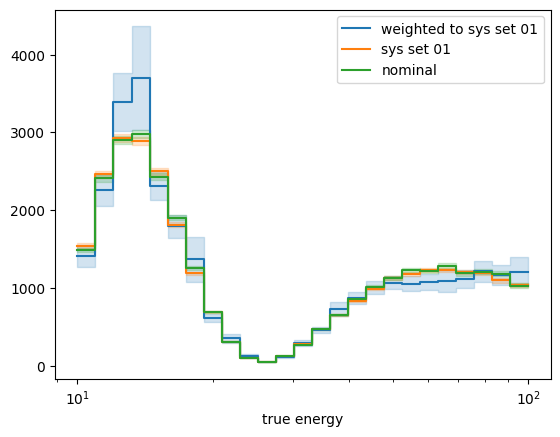

In [166]:
hist_at_sys_01 = generate_histogram_at_response(
    df_grad_net_poly3, default_response, gen_sys_1.detector_response, bin_edges, variable="true_energy"
)
sys_hist = gen_sys_1.get_histogram(bin_edges, variable="true_energy")
nominal_hist = gen_nominal.get_histogram(bin_edges, variable="true_energy")

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 01")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.xlabel("true energy")
plt.semilogx()
plt.legend()
plt.show()

In [167]:
def chi_square_at_response(df, nominal_response, response, bin_edges, use_systs=None, variable="reco_energy"):
    """Calculate the chi square between the nominal and a given detector response.
    """
    # generate new independent dataset at response with high statistics using new Generator
    gen_response = generator.Generator(
        n_events=int(1e6), response=response, pars=default_pars, rng_seed=42
    )
    # divide by 10 because we have generated 10 times more events
    hist_nominal = gen_response.get_histogram(bin_edges) / 10

    hist_response = generate_histogram_at_response(
        df, nominal_response, response, bin_edges, use_systs=use_systs, variable=variable
    )
    return chi_square(hist_nominal, hist_response)

In [168]:
test_response = generator.Response(1.1 * default_response.mu, default_response.sigma)
chi_square_at_response(df_grad_net_poly3, default_response, test_response, bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


31.70833650413161

In [169]:
chi2_grad_net = []
chi2_knn_grads = []
for mu in np.linspace(0.8, 1.2, 11):
    test_response = generator.Response(mu, default_response.sigma)
    chi2_grad_net.append(chi_square_at_response(df_grad_net, default_response, test_response, bin_edges))
    chi2_knn_grads.append(chi_square_at_response(df_grad_net_poly3, default_response, test_response, bin_edges))

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled b

[]

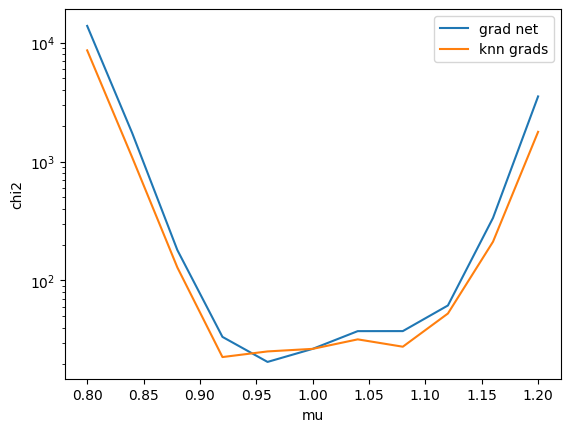

In [170]:
plt.plot(np.linspace(0.8, 1.2, 11), chi2_grad_net, label="grad net")
plt.plot(np.linspace(0.8, 1.2, 11), chi2_knn_grads, label="knn grads")
plt.xlabel("mu")
plt.ylabel("chi2")
plt.legend()
plt.semilogy()

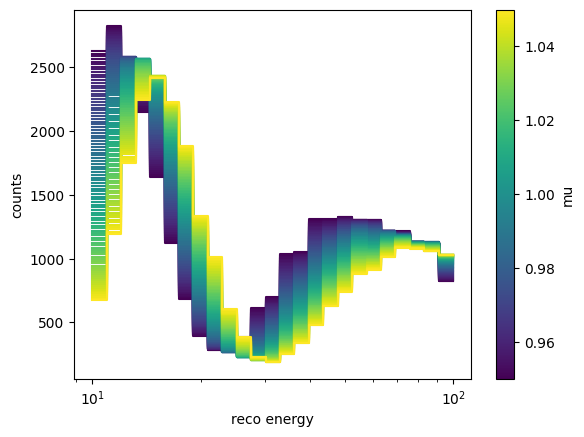

In [ ]:
# sweep response parameter mu around nominal value and plot the histograms
mus = np.linspace(0.95, 1.05, 100)
hists = []
for mu in mus:
    response = generator.Response(mu * default_response.mu, default_response.sigma)
    hists.append(generate_histogram_at_response(df_grad_net, default_response, response, bin_edges))

fig, ax = plt.subplots()
# make list of colors from a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(mus)))
for hist, mu, color in zip(hists, mus, colors):
    plot_histogram(hist, ax=ax, show_errorband=False, label="mu = {}".format(mu), color=color)
# make colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=mus.min(), vmax=mus.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("mu")
plt.xlabel("reco energy")
plt.ylabel("counts")
plt.semilogx()
plt.show()
